In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# Load data
df_graph = pd.read_csv('./data/graph.csv')
df_people = pd.read_csv('./data/people.csv')
df_graph = df_graph[df_graph.p1 != df_graph.p2].reset_index(drop = True)

In [5]:
# Rank by citations (total cited number by others)
corr = np.zeros((640, 640))
for j in range(len(df_graph)):
    corr[df_graph.p1[j], df_graph.p2[j]] = df_graph['count'][j]
    
citations = np.sum(corr, axis=0)
citations = sorted([(j, citations[j]) for j in range(len(citations))], key = lambda x: x[1], reverse = True)
citations = [(df_people.iloc[citations[j][0]].name_en + '(' + df_people.iloc[citations[j][0]].name_zh + ')', 
              citations[j][1]) for j in range(len(citations))]
# citations = [(df_people.iloc[citations[j][0]].name_en, 
#               citations[j][1]) for j in range(len(citations))]
citations = pd.DataFrame(columns=['name', 'citation'], data=citations)
citations_picked = citations[citations.citation > 100]

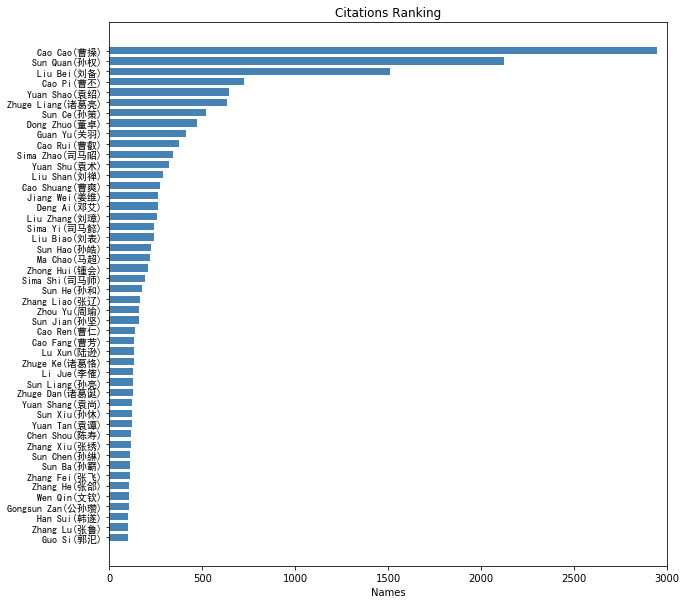

In [6]:
plt.figure(figsize = (10, 10))
plt.barh(range(len(citations_picked)), list(citations_picked.citation[::-1]), height=0.7, color='steelblue')      # 从下往上画
plt.yticks(range(len(citations_picked)), list(citations_picked.name[::-1]), fontproperties = 'simhei')
plt.xlim(0,3000)
plt.xlabel("Names")
plt.title("Citations Ranking")
plt.show()